### Singapore HDB Price Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [5]:
print("Data: ", len(df)) 
print("Columns: ", df.columns.tolist())   
df.head()

Data:  216375
Columns:  ['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'remaining_lease', 'resale_price']


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216375 entries, 0 to 216374
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                216375 non-null  object 
 1   town                 216375 non-null  object 
 2   flat_type            216375 non-null  object 
 3   block                216375 non-null  object 
 4   street_name          216375 non-null  object 
 5   storey_range         216375 non-null  object 
 6   floor_area_sqm       216375 non-null  float64
 7   flat_model           216375 non-null  object 
 8   lease_commence_date  216375 non-null  int64  
 9   remaining_lease      216375 non-null  object 
 10  resale_price         216375 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 18.2+ MB


In [7]:
df.describe() 

,floor_area_sqm,lease_commence_date,resale_price
count,216375.000000,216375.000000,2.163750e+05
mean,96.819319,1996.397176,5.209915e+05
std,24.023993,14.273853,1.845642e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1985.000000,3.850000e+05
50%,93.000000,1997.000000,4.900000e+05
75%,112.000000,2011.000000,6.250000e+05
max,366.700000,2022.000000,1.658888e+06


In [8]:
print("Locations: ", df['town'].unique())
print("Flat_Type:", df['flat_type'].unique())

Locations:  ['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']
Flat_Type: ['2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE' '1 ROOM'
 'MULTI-GENERATION']


In [9]:
print("range of prices: ", df['resale_price'].min(), "~", df['resale_price'].max())

range of prices:  140000.0 ~ 1658888.0


### 1. Price by Area

In [10]:
# The most expensive town
area_price = df.groupby('town')['resale_price'].mean().sort_values(ascending=False)
area_price

town
BUKIT TIMAH        769401.791834
BISHAN             703744.237229
CENTRAL AREA       685519.690165
BUKIT MERAH        632807.112869
QUEENSTOWN         631812.551892
KALLANG/WHAMPOA    587028.209578
PASIR RIS          578497.609012
TOA PAYOH          562645.030098
SERANGOON          559967.602200
TAMPINES           555983.984714
MARINE PARADE      554797.120392
CLEMENTI           548934.417982
PUNGGOL            538591.147786
SENGKANG           522399.264341
HOUGANG            515421.351649
GEYLANG            502897.708660
BUKIT PANJANG      497668.405618
BUKIT BATOK        496702.105692
SEMBAWANG          495717.613670
CHOA CHU KANG      485082.755557
BEDOK              476310.022185
ANG MO KIO         474910.000638
WOODLANDS          474366.360133
JURONG EAST        470210.421411
JURONG WEST        458802.828413
YISHUN             446679.047168
Name: resale_price, dtype: float64

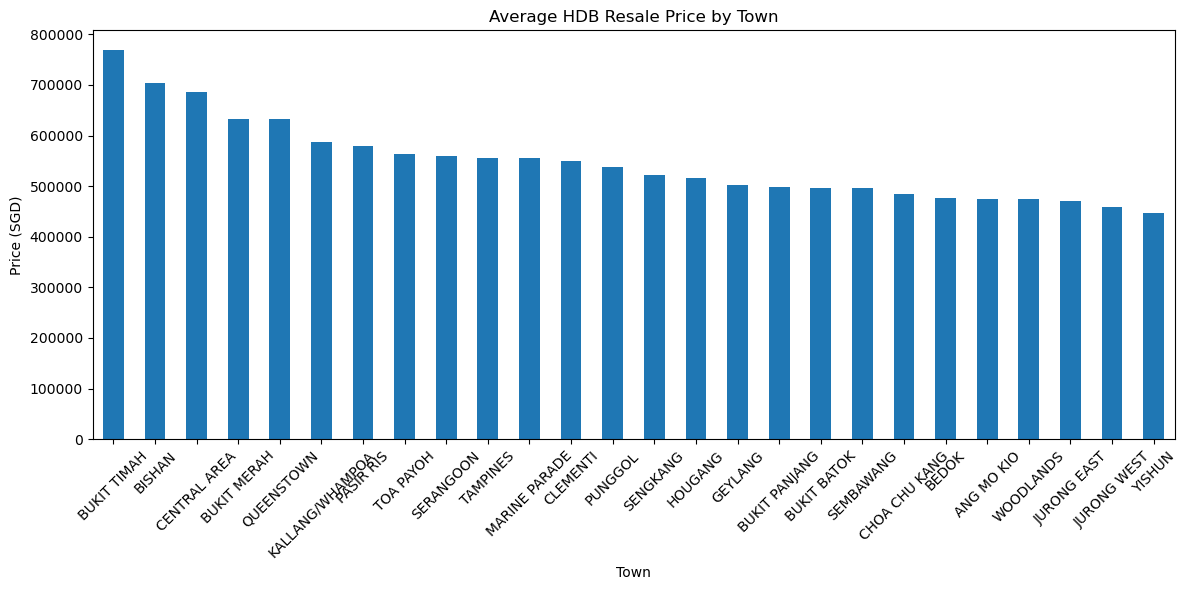

In [12]:
plt.figure(figsize=(12,6))
area_price.plot(kind='bar')
plt.title('Average HDB Resale Price by Town')
plt.xlabel('Town')
plt.ylabel('Price (SGD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. Price by Floor Range

In [13]:
# Prices per flat_type
Flat_type = df.groupby('flat_type')['resale_price'].mean().sort_values(ascending = False)
Flat_type

flat_type
MULTI-GENERATION    856736.047619
EXECUTIVE           726780.710370
5 ROOM              619363.194627
4 ROOM              524636.017379
3 ROOM              369114.387295
2 ROOM              297024.042034
1 ROOM              210128.556962
Name: resale_price, dtype: float64

In [14]:
# Compare with BISHAN and CENTRAL AREA of flat_type
bishan_types = df[df['town'] == 'BISHAN']['flat_type'].value_counts()
print("BISHAN")
print(bishan_types)

BISHAN
flat_type
4 ROOM              1834
5 ROOM              1137
3 ROOM               427
EXECUTIVE            386
MULTI-GENERATION      13
Name: count, dtype: int64


In [15]:
central_types = df[df['town'] == 'CENTRAL AREA']['flat_type'].value_counts()
print("CENTRAL AREA")
print(central_types)

CENTRAL AREA
flat_type
3 ROOM       695
4 ROOM       682
5 ROOM       244
2 ROOM        69
EXECUTIVE      2
Name: count, dtype: int64


In [16]:
# Checking higher floors prices
floor_price = df.groupby('storey_range')['resale_price'].mean().sort_values(ascending=False)
print("Average price by floor range:")
print(floor_price)

Average price by floor range:
storey_range
49 TO 51    1.228833e+06
46 TO 48    1.131352e+06
43 TO 45    1.090447e+06
40 TO 42    9.779005e+05
37 TO 39    9.093368e+05
34 TO 36    8.950271e+05
31 TO 33    8.863309e+05
28 TO 30    8.367866e+05
25 TO 27    7.513984e+05
22 TO 24    6.954087e+05
19 TO 21    6.672509e+05
16 TO 18    6.003635e+05
13 TO 15    5.579264e+05
10 TO 12    5.183877e+05
07 TO 09    5.043764e+05
04 TO 06    4.906870e+05
01 TO 03    4.707483e+05
Name: resale_price, dtype: float64


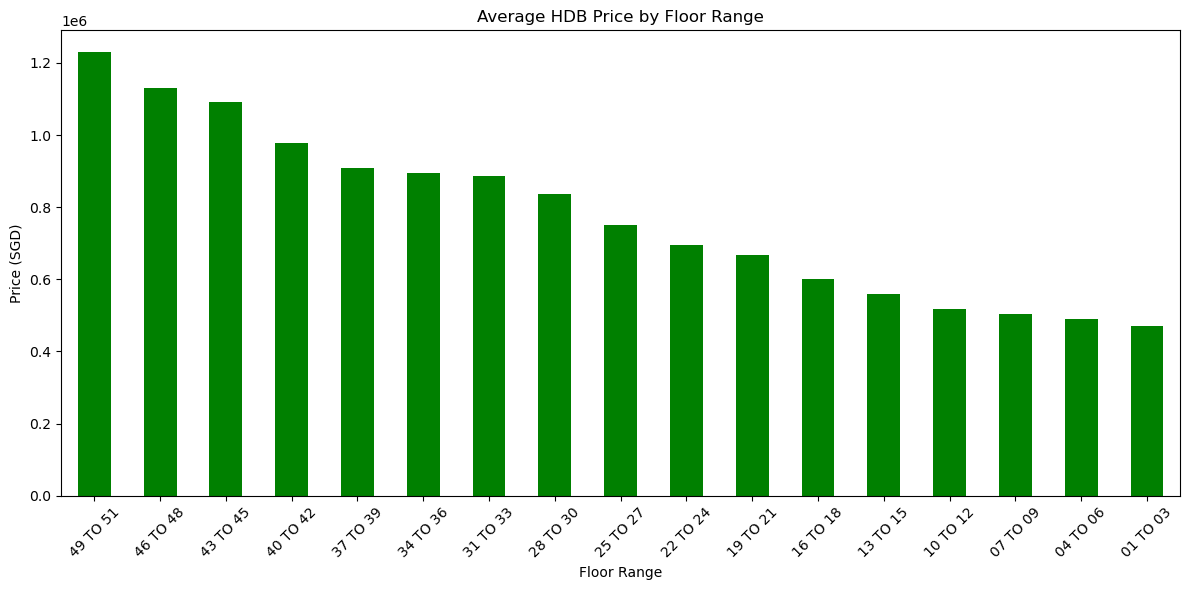

In [17]:
plt.figure(figsize=(12,6))
floor_price.plot(kind='bar', color='green')
plt.title('Average HDB Price by Floor Range')
plt.xlabel('Floor Range')
plt.ylabel('Price (SGD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3. Price per Square Meter

In [18]:
# Check the most expensive apt
most_expensive = df[df['resale_price'] == df['resale_price'].max()]
most_expensive

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
208590,2025-06,QUEENSTOWN,5 ROOM,92,DAWSON RD,22 TO 24,122.0,Premium Apartment Loft,2016,89 years 11 months,1658888.0


In [19]:
# Price per square meter
df['price_per_sqm'] = df['resale_price'] / df['floor_area_sqm']
area_price_per_sqm = df.groupby('town')['price_per_sqm'].mean().sort_values(ascending=False)
print("Price per sqm by area:")
print(area_price_per_sqm.head(10))

Price per sqm by area:
town
CENTRAL AREA       8165.605249
QUEENSTOWN         7497.353084
BUKIT MERAH        7191.207030
BUKIT TIMAH        6949.133651
KALLANG/WHAMPOA    6688.042759
BISHAN             6521.764366
MARINE PARADE      6340.520879
TOA PAYOH          6320.580151
CLEMENTI           6290.670464
GEYLANG            5922.940459
Name: price_per_sqm, dtype: float64


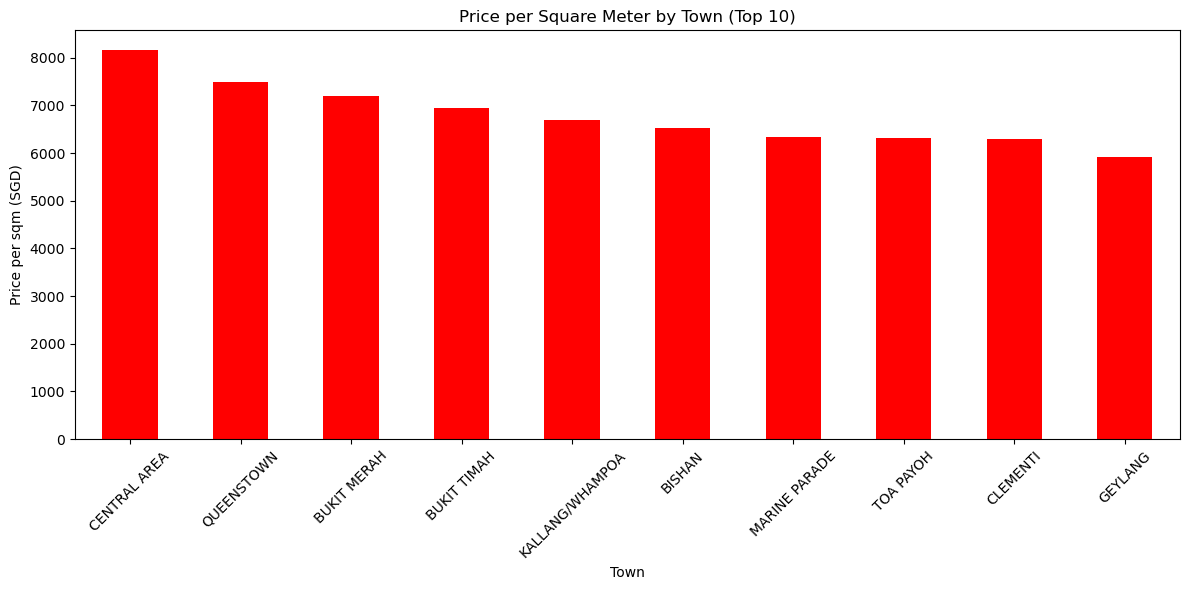

In [20]:
plt.figure(figsize=(12,6))
area_price_per_sqm.head(10).plot(kind='bar', color='red')
plt.title("Price per Square Meter by Town (Top 10)")
plt.xlabel('Town')
plt.ylabel('Price per sqm (SGD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
print("=== SINGAPORE HDB ANALYSIS SUMMARY ===")
print()
print("Key Findings:")
print("1. Most expensive areas (average price):")
print("   - BUKIT TIMAH: $769k")
print("   - BISHAN: $704k") 
print("   - CENTRAL AREA: $686k")
print()
print("2. Most expensive areas (price per sqm):")
print("   - CENTRAL AREA: $8,166/sqm")
print("   - QUEENSTOWN: $7,497/sqm")
print("   - BUKIT MERAH: $7,191/sqm")
print()
print("3. Floor premium: Higher floors cost significantly more")
print("   - Top floors (49-51): $1.23M")
print("   - Bottom floors (01-03): $470k")
print("   - Premium: 2.6x difference")

=== SINGAPORE HDB ANALYSIS SUMMARY ===

Key Findings:
1. Most expensive areas (average price):
   - BUKIT TIMAH: $769k
   - BISHAN: $704k
   - CENTRAL AREA: $686k

2. Most expensive areas (price per sqm):
   - CENTRAL AREA: $8,166/sqm
   - QUEENSTOWN: $7,497/sqm
   - BUKIT MERAH: $7,191/sqm

3. Floor premium: Higher floors cost significantly more
   - Top floors (49-51): $1.23M
   - Bottom floors (01-03): $470k
   - Premium: 2.6x difference
